In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [36]:
#dataframe = pd.read_csv(r"TipoPalabra_conteos_mean_umbral_mean.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAsDEVs.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,dif,sim verbos,CLASS
0,1.448654,0.000000,1.379265,0.373817,0.000000,0.000000,0.000000,0.0,1.795373,0.000000,...,0,0,5,0,0,3,1.0,1.0,0.234909,neutral
1,1.717893,0.000000,0.724830,0.000000,0.000000,0.000000,0.000000,0.0,1.017949,0.000000,...,0,0,4,0,0,1,1.0,1.0,0.288948,entailment
2,0.825094,0.000000,1.067380,0.000000,0.000000,0.000000,0.000000,0.0,0.791130,0.000000,...,0,0,1,1,1,0,1.0,1.0,0.288948,contradiction
3,4.209440,3.204832,1.402741,0.000000,3.240385,1.412841,0.391655,0.0,1.749404,1.338535,...,0,0,4,0,0,0,1.0,1.0,0.920121,entailment
4,3.209440,2.303836,1.402741,0.000000,2.911291,1.412841,0.391655,0.0,1.749404,1.012467,...,0,0,3,0,0,0,1.0,1.0,0.920121,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,1.000000,0.000000,0.341228,0.000000,0.000000,0.000000,0.871391,0.0,0.000000,0.000000,...,0,0,2,0,0,0,1.0,1.0,0.278433,entailment
9838,1.317596,0.000000,0.341228,0.000000,1.697802,0.000000,0.871391,0.0,2.254006,0.000000,...,0,0,2,0,0,0,1.0,1.0,0.278433,contradiction
9839,4.776979,0.000000,0.000000,0.000000,3.386796,0.000000,0.000000,0.0,0.710696,0.000000,...,0,0,2,0,1,0,0.0,1.0,1.000000,entailment
9840,5.671221,1.593846,1.602101,0.000000,4.028700,2.281842,0.000000,0.0,0.000000,0.000000,...,0,0,2,0,1,1,0.0,1.0,0.299625,contradiction


In [37]:
#dataframe.corr()

In [38]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,dif,sim verbos
count,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,...,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000
mean,3.289236,0.467912,1.354286,0.177750,0.739635,0.388919,0.435131,0.063401,1.022810,0.228439,...,0.057712,0.216318,0.039423,2.229222,0.056797,0.257671,0.294046,0.686856,0.999594,0.482668
std,2.465858,0.956368,1.217673,0.537694,1.031320,0.930192,0.674130,0.248665,1.028882,0.526561,...,0.317690,0.689496,0.270995,1.600569,0.247998,0.575430,0.572818,0.386565,0.020157,0.309912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070776
25%,1.737557,0.000000,0.483854,0.000000,0.000000,0.000000,0.000000,0.000000,0.350194,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.258873
50%,2.729329,0.000000,1.093051,0.000000,0.424291,0.000000,0.000000,0.000000,0.788667,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.331364
75%,4.135448,0.683967,1.849406,0.000000,1.076850,0.355948,0.702979,0.000000,1.415181,0.315123,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.863015
max,42.085467,18.691876,17.961368,6.116800,20.461089,15.515519,10.056646,3.566188,17.539507,11.018961,...,9.000000,12.000000,9.000000,18.000000,3.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [39]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    3278
entailment       3329
neutral          3235
dtype: int64


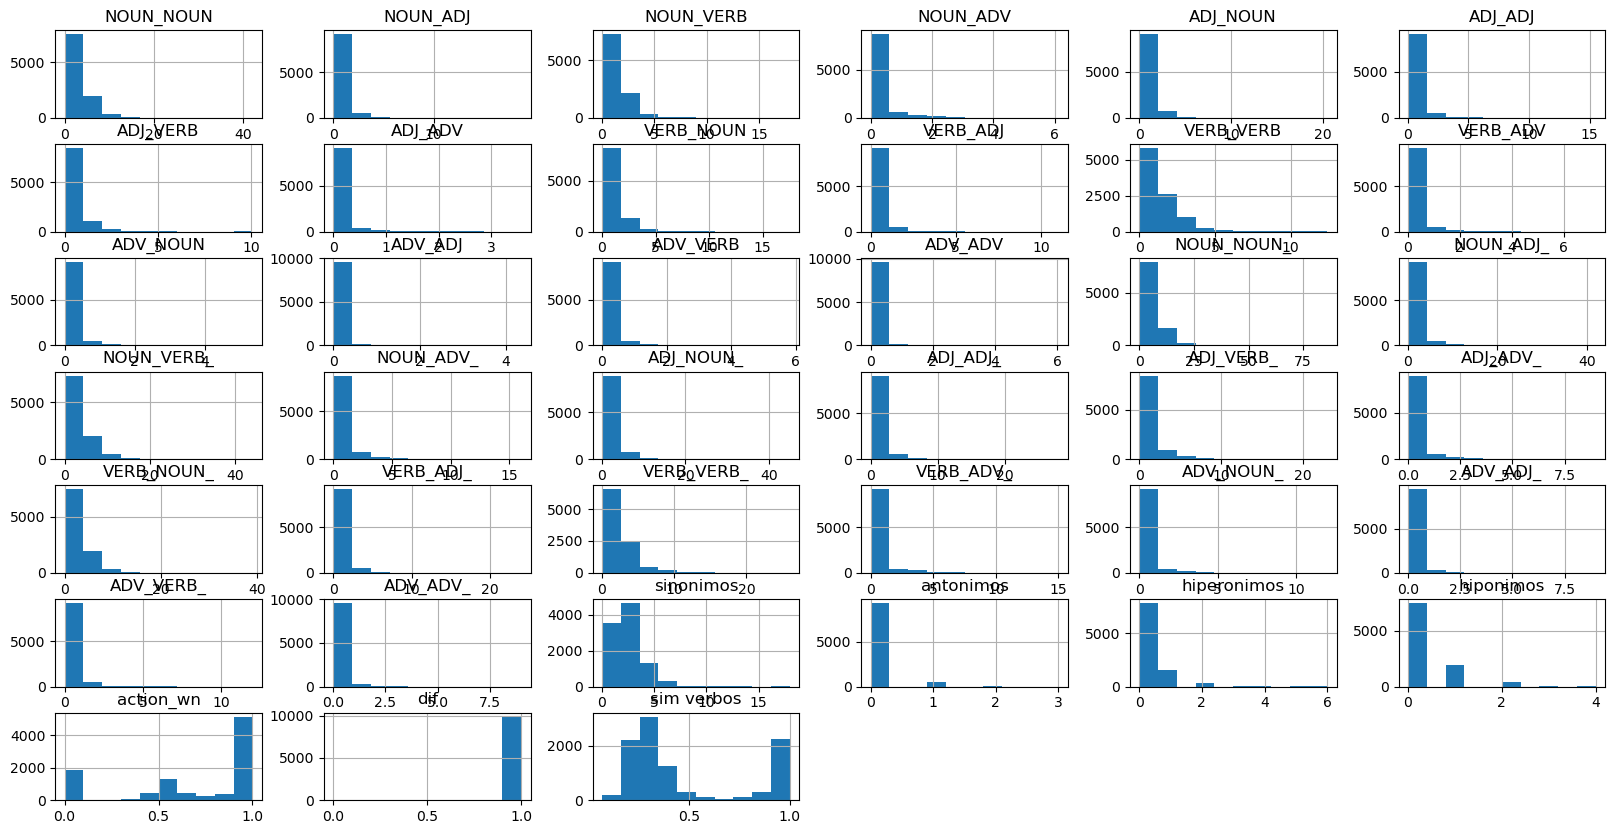

In [40]:
dataframe.hist(figsize=(20,10))
plt.show()

In [41]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [42]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [43]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_28944\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_28944\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(9842, 39)

In [44]:
y_test

array(['neutral', 'entailment', 'contradiction', ..., 'entailment',
       'contradiction', 'neutral'], dtype=object)

In [45]:
y

array(['neutral', 'entailment', 'contradiction', ..., 'entailment',
       'contradiction', 'neutral'], dtype=object)

In [46]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [47]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
model.decision_function(X)

array([[ 4.93863965e-01, -4.16888550e-01, -7.69754151e-02],
       [ 2.59168678e-02,  5.89030817e-02, -8.48199495e-02],
       [ 1.34966026e+00, -8.40182300e-01, -5.09477965e-01],
       ...,
       [-1.84993338e-01,  4.01664675e-01, -2.16671337e-01],
       [ 1.18571875e-03,  1.73211592e-01, -1.74397311e-01],
       [ 5.18269781e-01, -4.76169902e-01, -4.20998787e-02]])

In [49]:
labels=dataframe.columns[1:]

In [50]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [51]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [52]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  33 hiperonimos 2 NOUN_ADV
Entailment  8 VERB_ADJ 33 hiperonimos
Neutral  38 CLASS 33 hiperonimos


In [53]:
n_columns=dataframe.shape[1]-1

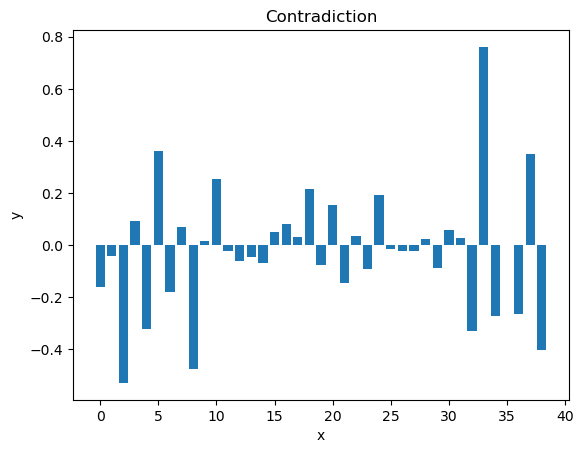

In [54]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

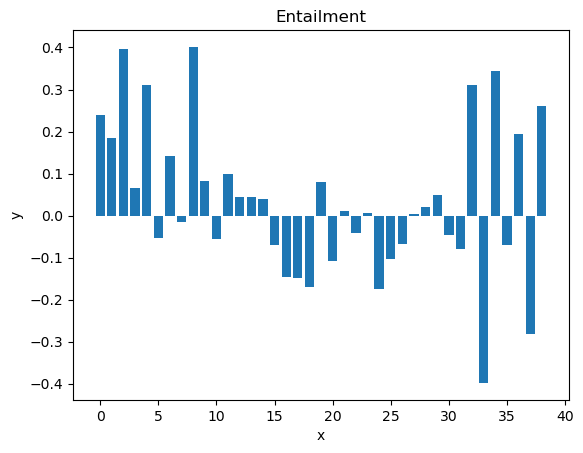

In [55]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

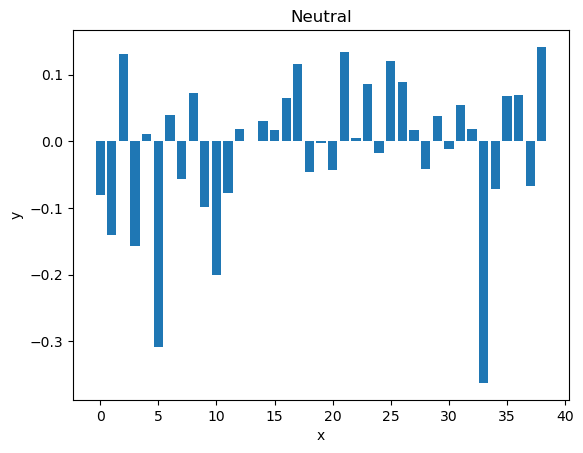

In [56]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [57]:
predictions = model.predict(X)
print(predictions)

['contradiction' 'entailment' 'contradiction' ... 'entailment'
 'entailment' 'contradiction']


In [58]:
y

array(['neutral', 'entailment', 'contradiction', ..., 'entailment',
       'contradiction', 'neutral'], dtype=object)

In [59]:
X

array([[1.44865415, 0.        , 1.37926453, ..., 1.        , 1.        ,
        0.23490924],
       [1.71789324, 0.        , 0.72483024, ..., 1.        , 1.        ,
        0.2889483 ],
       [0.82509446, 0.        , 1.06737956, ..., 1.        , 1.        ,
        0.2889483 ],
       ...,
       [4.77697858, 0.        , 0.        , ..., 0.        , 1.        ,
        1.00000012],
       [5.67122063, 1.59384623, 1.6021013 , ..., 0.        , 1.        ,
        0.29962534],
       [8.59063286, 4.83466285, 1.54740945, ..., 0.        , 1.        ,
        0.19411913]])

In [60]:
model.score(X,y)

0.5112781954887218

In [61]:
print(confusion_matrix(y, predictions))

[[2025  724  529]
 [ 690 2103  536]
 [1226 1105  904]]


In [62]:
print(f1_score(y,predictions, average=None))

[0.56101953 0.57925906 0.34742506]


In [63]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [64]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: 0.502472 (0.026473)


c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5139664804469274


In [66]:
print(confusion_matrix(Y_validation, predictions))

[[405 164 103]
 [140 415 101]
 [236 213 192]]


In [67]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.52      0.60      0.56       672
   entailment       0.52      0.63      0.57       656
      neutral       0.48      0.30      0.37       641

     accuracy                           0.51      1969
    macro avg       0.51      0.51      0.50      1969
 weighted avg       0.51      0.51      0.50      1969



In [68]:
#X_new = pd.DataFrame()
#model.predict(X_new)